<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Sim_help_desk_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de simulación discreta

En el presente notebook vamos a compartir un modelo de simulación discreta que he desarrollado para representar la operación de un centro de ayuda, al cual le llamaremos **Help Desk**.

El modelo es muy sencillo y puede ser ajustado para adaptarse perfectamente a otras realidades de procesos, servicios y negocios, como:

* centro de atención de clientes
* unidad de venta y activación de productos/servicios
* equipos de desarrollo y explotación de software
* atención médica / urgencias 
* línea de ensamble
* otros.

Una vez creado el modelo con la ayuda de python y el framework **SimPy**, procederemos a correr simulaciones de un escenario actual, con el propósito de conocer el rendimiento inicial del sistema Help Desk.  Luego procederemos a desarrollar distintos experimentos con el objetivo de buscar un escenario que satisfaga las necesidades de negocio que serán planteadas. Para tal efecto aplicaremos análisis estadístico que nos permita determinar la mejor solución.

**¿Qué es una simulación?**

Es una representación de un sistema del mundo real. Podemos usar modelos matemáticos o computacionales para estudiar cómo funciona un sistema, o qué sucede cuando se cambian partes de él.
Las simulaciones se utilizan en centros de antención, bancos, restaurantes, aeropuertos, mecánicos, hospitales y muchos otros sistemas donde la mala asignación de recursos y aqruitecturas de procesos y métodos, puede provocar congestión, insatisfacción del cliente y retrasos críticos con impacto en las personas y resultados de negocio.

##Procedemos a instalar SimPy y cargar las librerias

**¿Qué es SimPy?**: 
Es un framework de simulación de eventos discretos basado en procesos, que está basado en Python estándar. SimPy se lanza como software de código abierto bajo la licencia MIT. La primera versión fue lanzada en diciembre de 2002.

In [ ]:
pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Cargamos principales librerias para trabajar nuestro modelamiento
import random
import simpy
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Modelamiento del Help Desk

Vamos a imaginar que trabajamos en un HelpDesk que tiene la misión de atender requerimientos de clientes.

El servicio que vamos a modelar tiene la siguiente estructura secuencial de procesos:

> Creación de Requerimiento >>  Proceso N°1  >>  Proceso N°2  >>  Fin

<img src='https://drive.google.com/uc?export=view&id=1kdEGpORIMMtnP3Xl3bZQ-gYh7o44QAtE' width="1000" align="center" style="margin-right: 20px"> 
<br>


<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>



###Creación de Requerimiento

Por una parte tenemos clientes, quienes son los que crean tickets para solicitar una atención, a esto le llamaremos Requerimiento.

Para considerar la variabilidad a este proceso de arribo de Requerimientos al sistema Help Desk, hemos estudiado la cantidad promedio de tickets que se crean por hora (durante el último mes) y esto nos da una media de 15.0 Tickets creados por hora (este parámetro se llama lambda en una distribución poisson).

* λ = 15.0 (ticket / hora) = 0.25 (ticket / minuto)

Con este parametro calcularemos el tiempo promedio entre llegadas de tickets al sistema, lo que nos da una media en minutos igual a 4.0 (minutos/ticket), es decir, en promedio un ticket arriba al sistema Help Desk cada 4 minutos. Incorporaremos una distribución exponencial a esta variable, tal como se aprecia en la imagen superior.

* 1/λ = 1 / 0.25  = 4.0 minutos/ticket

Una vez creado el ticket (Requerimiento) este es depositado en un Backlog único, al cual le llamaremos **Backlog #1**. En este lugar los tickets esperan hasta que exista disponibilidad de un Agente del proceso #1 para ser atendido.




###Proceso N°1

Este proceso corresponde a la primera parte del trabajo que debe ser desarrollado para atender y resolver por completo el Requerimiento.

Este proceso es ejecutado por "Agentes de proceso #1", ellas son personas especializadas en esta etapa del servicio. Actualmente el sistema cuenta con **2** Agentes de proceso #1.

Para incorporar la variabilidad que existe en este proceso #1, hemos estudiado el tiempo de ciclo de este proceso, el cual sigue una distribución Gamma, tal como se muestra en la imagen superior. Este proceso tiene una media de 17.9 minutos de duración.

Una vez finalizada esta parte del servicio, el ticket queda en un segundo backlog único, al cual le llamaremos **Backlog #2**.  En este lugar los tickets esperan hasta que exista disponibilidad de un Agente del proceso #2 para ser atendido y finalizar por completo el trabajo requerido por los clientes.

###Proceso N°2

Este proceso corresponde a la segunda y última parte del trabajo que debe ser desarrollado para resolver por completo el Requerimiento.

Este proceso es ejecutado por "Agentes de proceso #2", ellas son personas especializadas en esta etapa del servicio. Actualmente el sistema cuenta con **2** Agentes de proceso #2.

Para incorporar la variabilidad que existe en este proceso #2, hemos estudiado el tiempo de ciclo de este proceso, el cual sigue una distribución Gamma, tal como se muestra en la imagen superior. Este proceso tiene una media de 24.5 minutos de duración.

Una vez finalizada esta parte del servicio, el ticket queda resuelto y así se finaliza por completo el Requerimiento del cliente.



###Simulación y Respuestas

El escenario que será simulado corresponde a la situación inicial del Help Desk. Este escenario cuenta con los siguientes parámetros:

* Tasa de creación tickets: λ = 15 (ticket/hora)
* Tiempo entre creación de tickets sigue distribución Exponencial con:
  * 1/ λ = 4 minutos
* Tiempo de proceso #1 sigue distribución Gamma con 
  * alpha = 9.0
  * beta = 2.0
* Tiempo de proceso #2 sigue distribución Gamma con 
  * alpha = 7.0
  * beta = 3.5
* Cantidad Agentes proceso N°1:   2 personas
* Cantidad Agentes proceso N°2:   2 personas

El tiempo de simulación será de 8 horas, ya que se necesita evaluar el rendimiento de un día de trabajo en el Help Desk.

> 1 día laboral = 8 horas cronológicas

Las respuestas del sistema que serán medidas son:
* Cantidad de tickets creados en un día laboral
* Cantidad de tickets resueltos en un día laboral
* Nivel de atención de un día laboral. Correponde a la proporción de los tickets que fueron resueltos del total de tickets creados.
* Leadtime end to end de un día laboral. Corresponde al tiempo promedio de duración de un ticket, desde que es creado por cliente hasta que este es resuelto.


##Creación del modelo en python con SimPy

A continuación encontrarás el código que se ha desarrollado para simular el Help Desk propuesto.

In [ ]:
#Inicio

#crear listas para almacenar datasets y su posterior análisis de resultados
arrival_times = [] #corresponde al tiempo en que ingresa al Backlog el requerimiento
wait_times_1 = [] #corresponde al tiempo transcurrido desde que el cliente ingresa un requerimiento (ticket) al HelpDesk hasta que lo comienza a trabajar un agente del proceso #1
wait_times_2 = [] #corresponde al tiempo transcurrido desde que el agente del proceso #1 finaliza su parte, hasta el agente del proceso #2 comienza su etapa del trabajo
support_times_1 = [] #corresponde al tiempo transcurrido desde que agente del proceso #1 comienza a trabajar el requerimiento hasta que finaliza su etapa del trabajo
support_times_2 = [] #corresponde al tiempo transcurrido desde que agente del proceso #2 comienza a trabajar el requerimiento hasta que finaliza su etapa del trabajo
total_times = [] #corresponde al tiempo transcurrido desde que el cliente ingresa un requerimiento (ticket) al HelpDesk hasta que es completamente resuelto

RANDOM_SEED = 2 #fijar una semilla para correr 1 replica reproducible

#Creamos parametros del modelo:
NUM_EMPLOYEES_1 = 2     #Número de agentes en el proceso #1 del ciclo de trabajo
NUM_EMPLOYEES_2 = 2    #Número de agentes en el proceso #2 del ciclo de trabajo

#Tiempos de los 2 procesos secuenciales con gamma distribution
# proceso #1
alpha= 9.0
beta= 2.0
# proceso #2
alpha_2 = 7.00
beta_2= 3.50

SUPPORT_TIME_1 = alpha * beta  #Minutos promedio para el trabajo del proceso #1
SUPPORT_TIME_2 = alpha_2 * beta_2  #Minutos promedio para el trabajo del proceso #1
AVG_CUSTOMER_HOUR = 15 #en promedio llegan X tickets por hora al backlog del HelpDesk (esto es el lambda de poisson)
CUSTOMER_INTERVAL = 60/AVG_CUSTOMER_HOUR # Crea un cliente cada X minutos
SIM_TIME = 60*8        # tiempo de simulación en minutos

customers_handled = 0

class HelpDesk(object):
#Un Help Desk tiene un número limitado de agentes (empleados) para atender requerimientos de clientes
#El ciclo de vida del Requerimiento consta de 2 procesos (etapas) secuenciales (proceso #1 y proceso #2)
#Los clientes crean un Requerimiento, este ingresa a un Backlog donde debe esperar a uno de los agentes del primer proceso
#Cuando un Requerimiento consigue disponibilidad de un agente del primer proceso, comienza a ser atendido requerimiento hasta que finaliza el proceso #1
#Una vez finalizada la parte del primer proceso, el requerimiento entra al backlog del segundo proceso
#Cuando un Requerimiento consigue disponibilidad de un agente del segundo proceso, comienza a ser atendido hasta que finaliza el proceso #2 y allí finaliza la atención

    def __init__(self, env, num_employees_1, num_employees_2, support_time_1, support_time_2):
        self.env = env
        self.staff_1 = simpy.Resource(env, num_employees_1)
        self.staff_2 = simpy.Resource(env, num_employees_2)
        self.support_time_1 = support_time_1
        self.support_time_2 = support_time_2

    def support_1(self, customer):
        #El proceso #1 trabaja en la primera parte del Requerimiento
        random_time_1 = random.gammavariate(alpha, beta)
        yield self.env.timeout(random_time_1)
        print(f"Proceso #1 finalizado para Cliente {customer} at {self.env.now:.2f}")

    def support_2(self, customer):
        #El proceso #2 trabaja en la segunda parte del Requerimiento
        random_time_2 = random.gammavariate(alpha_2, beta_2)
        yield self.env.timeout(random_time_2)
        print(f"Proceso #2 finalizado para Cliente {customer} at {self.env.now:.2f}")

def customer(env, name, help_desk):
    #Los clientes (cada cliente tiene un nombre) crean Requerimientos en el Help Desk y para ser resueltos por agentes
    #Luego los Requerimiento de clientes comienzan a ser atendidos por un Agente del proceso #1, esperan hasta
    #que finaliza la la primera parte del trabajo del proceso #1, luego el requerimiento ingresa al backlog del proceso #2
    #El Requerimiento comienza a ser atendido por un Agente del proceso #2, los clientes esperan hasta que finaliza la segunda parte
    #del trabajo del proceso #2, y luego el Requerimiento finaliza por completo, saliendo del Help Desk (para no volver de nuevo..)  
    
    arrival_time = env.now #guarda el minuto de creación del Requerimiento del cliente
    arrival_times.append(arrival_time) #calcula el tiempo de que ingresa ticket al backlog
    global customers_handled
    print(f"Cliente {name} ingresa requerimiento al Backlog #1 at {env.now:.2f}!")
    with help_desk.staff_1.request() as request:
        yield request
        # Cliente se dirije a ser atendido por un primer agente
        print(f"Cliente {name} comienza a ser atendido su requerimiento por el proceso #1 at {env.now:.2f}")
        start_support_time_1 = env.now #guarda el minuto en que se inicia la atención del cliente 
        wait_times_1.append(env.now - arrival_time) #calcula el tiempo de espera en la cola 1
        
        yield env.process(help_desk.support_1(name))
        # Cliente sale del primer proceso
        print(f"Cliente {name} su requerimiento finaliza el proceso #1 at {env.now:.2f}")
        #customers_handled += 1       
        support_times_1.append(env.now - start_support_time_1) #calcula el tiempo de atención del proceso #1

    print(f"Cliente {name} su requerimiento ingresa al Backlog #2 at {env.now:.2f}!")
    with help_desk.staff_2.request() as request:
        yield request
        # Cliente se dirije a ser atendido por un segundo agente
        print(f"Cliente {name} comienza a ser atendido su requerimiento por el proceso #2 at {env.now:.2f}")
        start_support_time_2 = env.now #guarda el minuto en que se inicia la atención del cliente 
        #wait_times_2.append(env.now - arrival_time) #calcula el tiempo de espera en la cola 2
        
        yield env.process(help_desk.support_2(name))
        # Cliente sale del segundo proceso y finaliza la atención
        print(f"Cliente {name} su requerimiento finaliza el proceso #2 y se cierra ticket at {env.now:.2f}")
        customers_handled += 1       
        support_times_2.append(env.now - start_support_time_2) #calcula el tiempo de atención del proceso #2
        total_times.append(env.now - arrival_time) #calcula el tiempo total (todo el proceso de atención)

def setup(env, num_employees_1, num_employees_2, support_time_1, support_time_2, customer_interval):
#Crea un Help Desk, un número inicial de clientes y luego se mantendrá creando clientes cada "CUSTOMER_INTERVAL" minutos
    #Crea el Help Desk
    help_desk = HelpDesk(env, num_employees_1, num_employees_2, support_time_1, support_time_2)

    #Crea 5 clientes iniciales
    for i in range(1, 2):
        env.process(customer(env, i, help_desk))

    #crea más clientes mientras la simulaciíon está corriendo
    while True:
        yield env.timeout(random.expovariate(1/customer_interval))
        i += 1
        env.process(customer(env, i, help_desk))


# Setup and start the simulation  
print("Se inicia la Simulación del Help Desk - por", SIM_TIME , "minutos")
random.seed(RANDOM_SEED)  #esto nos ayudará a reproducir los resultados

# Crea un environment e inicia el proceso setup
env = simpy.Environment()
env.process(setup(env, NUM_EMPLOYEES_1, NUM_EMPLOYEES_2, SUPPORT_TIME_1, SUPPORT_TIME_2, CUSTOMER_INTERVAL))

# Execute!
env.run(until=SIM_TIME)

print("Customer handled: " + str(customers_handled))


#Respuestas
NA = customers_handled / len(arrival_times) #Nivel de atencion
print(len(arrival_times), ";") #cantidad tickets creados
print(customers_handled, ";") #cantidad tickets resueltos
print(NA, ";") #Nivel atencion
print(np.mean(total_times)) #leadtime 

Se inicia la Simulación del Help Desk - por 480 minutos
Cliente 1 ingresa requerimiento al Backlog #1 at 0.00!
Cliente 1 comienza a ser atendido su requerimiento por el proceso #1 at 0.00
Proceso #1 finalizado para Cliente 1 at 10.11
Cliente 1 su requerimiento finaliza el proceso #1 at 10.11
Cliente 1 su requerimiento ingresa al Backlog #2 at 10.11!
Cliente 1 comienza a ser atendido su requerimiento por el proceso #2 at 10.11
Cliente 2 ingresa requerimiento al Backlog #1 at 12.50!
Cliente 2 comienza a ser atendido su requerimiento por el proceso #1 at 12.50
Cliente 3 ingresa requerimiento al Backlog #1 at 13.97!
Cliente 3 comienza a ser atendido su requerimiento por el proceso #1 at 13.97
Cliente 4 ingresa requerimiento al Backlog #1 at 17.45!
Cliente 5 ingresa requerimiento al Backlog #1 at 19.45!
Cliente 6 ingresa requerimiento al Backlog #1 at 24.59!
Proceso #1 finalizado para Cliente 3 at 25.98
Cliente 3 su requerimiento finaliza el proceso #1 at 25.98
Cliente 3 su requerimiento in

##Análisis de resultados

Luego de correr un día laboral, es decir, una réplica del modelo durante 8 horas, los resultados que vemos son:

* Cantidad de tickets creados en un día laboral = **106**
* Cantidad de tickets resueltos en un día laboral = **37** 
* Nivel de atención de un día laboral = **34.9%**
* Leadtime end to end de un día laboral = **174.5** minutos

Los datos anteriores son valores agregados del día laboral simulado, por tanto esconden detalle. Por ejemplo si quisieramos conocer la distribución completa de los tiempos totales de atención (que en promedio nos da un leadtime de 174.5 min) tenemos que tomar el dataset creado donde está el registro de cada tocket resuelto con su tiempo total de atención.

En el siguiente gráfico podremos apreciar todo este detalle de los tiempos totales de atención:

[42.66816688704138, 35.04455673950152, 55.381488633057224, 67.34987600208916, 80.05224326374623, 71.16310082205617, 103.11295652928604, 89.20309618546233, 105.21646967749413, 112.71275542223248, 125.95212569980748, 127.16741912428326, 132.69379710954078, 153.71700018083692, 155.40705447061225, 165.06688169227039, 159.8828483336034, 170.83790392494393, 176.37636923895911, 192.55379988849472, 183.1836388400512, 198.817949431194, 208.049718138486, 210.71410371279563, 220.19484405066794, 218.05475634358493, 233.69414078607616, 238.1512171365627, 237.511695769106, 243.01056997002075, 259.98316807376585, 264.4431518776433, 273.3398557628204, 274.40338086937663, 277.8876731464829, 295.3352289216651, 301.05465459364325]
n:  37
Leadtime de un día : 174.57809884457464 minutos


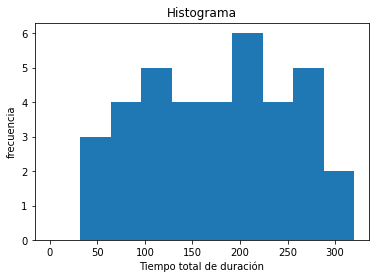

In [ ]:
#Graficar histograma de tiempos totales de atención

print(total_times) #este es el dataset
print('n: ', len(total_times)) 
print('Leadtime de un día :', np.mean(total_times), 'minutos')

plt.hist(total_times, bins=10, range=(0, 320))
plt.ylabel('frecuencia')
plt.xlabel('Tiempo total de duración')
plt.title('Histograma')
plt.show()

Como podemos ver nuestro modelo al considerar la variabilidad de los factores incorporados en el modelo, nos permite el dinamismo y aleatoridad en los resultados. Por esta razón podemos ver tickets con tiempos totales muy bajos cercanos a 40 minutos, y otros extremos por la derecha cercados a los 310 minutos. Por esta razón los modelos lineales basados en valores promedios y constantes, entregan resultados que normalmente subestiman la realidad.

En el siguiente gráfico he creado un run chart para ver como evolucionan los tiempos totales de los tickets. Claramente podemos ver la tendencia al alza, lo que es muy preocupante, ya que nos indica que si la jornada tuviera más de 8 horas, los tiempos seguirían subiendo, y con ello el Leadtime. Claramente este sistema de trabajo se encuentra desbalanceado.



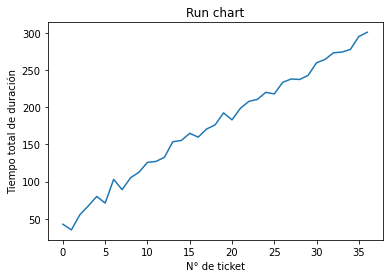

In [ ]:
#Graficar run chart

plt.plot(total_times)
plt.ylabel('Tiempo total de duración')
plt.xlabel('N° de ticket')
plt.title('Run chart')
plt.show()

Recordemos que la simulación corrida anteriormente fue solo una, y como estamos en la presencia de un modelo probabilístico, tener solo una réplica para análisis y toma de deciones, es muy riesgoso. La solución sugerida aquí es correr varias simulaciones, un buen número es 30 o más (regla de pulgar), y con sus respuestas construir histogramas y calcular intervalos, que nos entreguen mayor confiabilidad de los resultados obtenidos.

A continuación presentaremos en el análisis de resultados luego de correr 30 veces el modelo de situación inicial. Recordemos que el modelo incial cuenta con 2 agentes en proceso N°1 y otros 2 agentes en el proceso N°2, por tanto en total tiene 4 agentes nuestro Help Desk.


### Análisis de Resultados Modelo situación inicial con 4 agentes (2 + 2)

* Cantidad agentes en proceso N° 1 = **2**
* Cantidad agentes en proceso N° 2 = **2**

####Cantidad de tickets creados en un día laboral

media :  123.06666666666666
mediana :  123.0
desv. std :  11.272187996224256
con un  0.9 de Nivel de confianza el intervalo está entre:  104.52556735739834 141.60776597593497
con un  0.9 de Nivel de confianza el intervalo está entre:  105.0 142.0


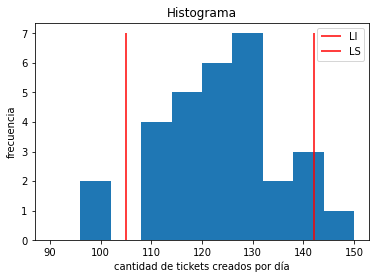

In [ ]:
#dataset "cantidad de tickets creados" luego de las 30 replicas 

q_creados_2_2 = (112,	138,	115,	129,	110,	140,	121,	113,	126,	149,	123,	141,	128,	130,	111,	134,	123,	123,	118,	123,	120,	97,	118,	115,	119,	128,	127,	133,	127,	101)
print('media : ', np.mean(q_creados_2_2))
print('mediana : ', np.median(q_creados_2_2))
print('desv. std : ', np.std(q_creados_2_2))

#calculo intervalos
#aplicando Normal
alpha = 0.10
NC = 1 - alpha #nivel de confianza
Z = stats.norm.ppf(1-(alpha)/2)
LI = np.mean(q_creados_2_2) - ( Z * np.std(q_creados_2_2))
LS = np.mean(q_creados_2_2) + ( Z * np.std(q_creados_2_2))

print("con un ", NC, "de Nivel de confianza el intervalo está entre: ", LI, LS)



#aplicando Poisson (dado que es una variable discreta)
LI_p = stats.poisson(np.mean(q_creados_2_2)).ppf(alpha/2)
LS_p = stats.poisson(np.mean(q_creados_2_2)).ppf(1-alpha/2)
print("con un ", NC, "de Nivel de confianza el intervalo está entre: ", LI_p, LS_p)

#graficando
plt.hist(q_creados_2_2, bins=10, range=(90, 150))
plt.vlines(ymin=0, ymax=7, x=LI_p,  colors='r', label='LI')
plt.vlines(ymin=0, ymax=7, x=LS_p,  colors='r', label='LS')
plt.ylabel('frecuencia')
plt.xlabel('cantidad de tickets creados por día')
plt.title('Histograma')
plt.legend()
plt.show()


El análisis arrojó que en promedio un día laboral recibirá 123 tickets, y con una seguridad del 90% podemos concluir que la cantidad de tickets creados por día estará entre 105 y 142.

Recordemos que el lambda definido al inicio del modelamiento era de 15 tickets por hora, si hubiesemos modelado el Help Desk de forma determinística siempre tendriamos 120 tickets por día (8 horas x 15 ticket/hora). La probabilidad de que ocurra esta situación es cercana a un 4%, cifra extremadamente baja, lo que hubiese generado resultados muy riesgosos para los experimentos, análisis y sus conclusiones.



In [ ]:
#probabilidad de tener en un día 120 tickets
prob_120= stats.poisson(np.mean(q_creados_2_2)).pmf(120)
print("probabilidad de tener en un día 120 tickets: ", prob_120)

probabilidad de tener en un día 120 tickets:  0.03501744291370185


####Cantidad de tickets resueltos en un día laboral

media :  36.13333333333333
mediana :  36.0
desv. std :  2.2020192753218324
con un  0.9 de Nivel de confianza el intervalo está entre:  32.511333941703164 39.7553327249635


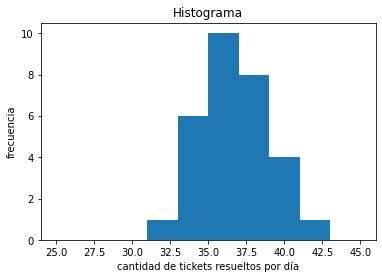

32
41


In [ ]:
#dataset "cantidad de tickets resueltos" luego de las 30 replicas 

q_resueltos_2_2 = (33,	32,	35,	37,	38,	39,	41,	36,	39,	35,	34,	36,	36,	37,	37,	37,	36,	38,	39,	37,	33,	35,	33,	35,	33,	36,	34,	40,	36,	37)
print('media : ', np.mean(q_resueltos_2_2))
print('mediana : ', np.median(q_resueltos_2_2))
print('desv. std : ', np.std(q_resueltos_2_2))

#calculo intervalos
#aplicando Normal
alpha = 0.10
NC = 1 - alpha #nivel de confianza
Z = stats.norm.ppf(1-(alpha)/2)
LI = np.mean(q_resueltos_2_2) - ( Z * np.std(q_resueltos_2_2))
LS = np.mean(q_resueltos_2_2) + ( Z * np.std(q_resueltos_2_2))

print("con un ", NC, "de Nivel de confianza el intervalo está entre: ", LI, LS)

plt.hist(q_resueltos_2_2, bins=10, range=(25, 45))
plt.ylabel('frecuencia')
plt.xlabel('cantidad de tickets resueltos por día')
plt.title('Histograma')
plt.show()

#calculo de min y max
print(np.min(q_resueltos_2_2))
print(np.max(q_resueltos_2_2))

El análisis arrojó que en promedio en un día laboral se finalizarán/solucionarán 36 tickets, y con una seguridad del 90% podemos concluir que la cantidad de tickets resueltos por día estará entre 33 y 40.

####Nivel de atención de un día laboral

media :  0.29600814211673093
mediana :  0.289752316127812
con un  0.9 de Nivel de confianza el intervalo está entre:  0.24371796996051448 0.3482983142729474


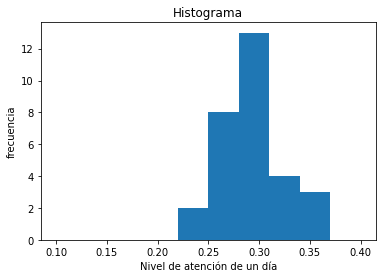

In [ ]:
#dataset "nivel de atención" luego de las 30 replicas 

nivel_atencion_2_2 = (0.294642857142857,	0.231884057971014,	0.304347826086956,	0.286821705426356,	0.345454545454545,	0.278571428571428,	0.338842975206611,	0.31858407079646,	0.309523809523809,	0.23489932885906,	0.276422764227642,	0.25531914893617,	0.28125,	0.284615384615384,	0.333333333333333,	0.276119402985074,	0.292682926829268,	0.308943089430894,	0.330508474576271,	0.300813008130081,	0.275,	0.360824742268041,	0.279661016949152,	0.304347826086956,	0.277310924369747,	0.28125,	0.26771653543307,	0.300751879699248,	0.283464566929133,	0.366336633663366)
print('media : ', np.mean(nivel_atencion_2_2))
print('mediana : ', np.median(nivel_atencion_2_2))

#calculo intervalos
#aplicando Normal
alpha = 0.10
NC = 1 - alpha #nivel de confianza
Z = stats.norm.ppf(1-(alpha)/2)
LI = np.mean(nivel_atencion_2_2) - ( Z * np.std(nivel_atencion_2_2))
LS = np.mean(nivel_atencion_2_2) + ( Z * np.std(nivel_atencion_2_2))
print("con un ", NC, "de Nivel de confianza el intervalo está entre: ", LI, LS)

plt.hist(nivel_atencion_2_2, bins=10, range=(0.1, 0.4))
plt.ylabel('frecuencia')
plt.xlabel('Nivel de atención de un día')
plt.title('Histograma')
plt.show()

El análisis arrojó que en promedio en un día laboral se podrán resolver el 29.6% de los tickets recibidos, y con una seguridad del 90% podemos concluir que  el nivel de atención diario estará entre 24.3% y 34.8%.

####Leadtime end to end de un día laboral

media :  190.82992489992446
mediana :  190.323227804947
desv. std :  13.831829682968879
con un  0.9 de Nivel de confianza el intervalo está entre:  168.07858967851809 213.58126012133084


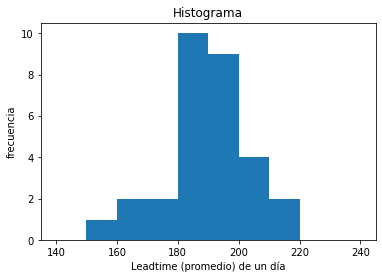

In [ ]:
#dataset "leadtime" luego de las 30 replicas 

leadtime_2_2 = (188.827856690904,	199.922963853521,	187.007727778683,	194.425959485549,	188.524303601884,	202.185320030128,	187.53344023586,	202.142265787084,	185.391470825178,	217.064384301977,	187.007480372357,	184.267098972501,	185.375935176701,	197.567710552377,	164.295758772825,	193.565318693733,	195.543044599861,	208.537960533699,	178.505435623653,	199.677806262011,	198.638547391796,	191.095241289683,	189.551214320211,	213.109510763968,	174.301212768979,	207.708104307923,	160.241554905982,	188.001880739077,	157.381055075366,	197.500183284262)
print('media : ', np.mean(leadtime_2_2))
print('mediana : ', np.median(leadtime_2_2))
print('desv. std : ', np.std(leadtime_2_2))

#calculo intervalos
#aplicando Normal
alpha = 0.10
NC = 1 - alpha #nivel de confianza
Z = stats.norm.ppf(1-(alpha)/2)
LI = np.mean(leadtime_2_2) - ( Z * np.std(leadtime_2_2))
LS = np.mean(leadtime_2_2) + ( Z * np.std(leadtime_2_2))
print("con un ", NC, "de Nivel de confianza el intervalo está entre: ", LI, LS)

plt.hist(leadtime_2_2, bins=10, range=(140, 240))
plt.ylabel('frecuencia')
plt.xlabel('Leadtime (promedio) de un día')
plt.title('Histograma')
plt.show()

El análisis arrojó que en promedio la media diaria de tiempos totales de atención (leadtime de un día laboral) es de 190.8 minutos, y con una seguridad del 90% podemos concluir que la media diaria de tiempos totales de atención (leadtime de un día laboral) estará entre 168.0 y 213.5 minutos.


Recordemos que el gráfico anterior nos muestra la distribución de las medias de un día laboral (8 horas) de los tiempos totales de atención de los tickets que si fueron resueltos, por tanto aquí tendremos calculos de estas medias con muestras de entre 31 y 41 tickets (véase distribución de tickets resueltos). Por tanto este gráfico nos esconde el detalle de la distribución de los tiempos totales de los tickets, para ver este detalle a continuación presentaré un histrograma de estos tiempos luego de juntar dataset de 6 réplicas corridas.

media:  179.75070056990987
desv. std:  87.43725619876177


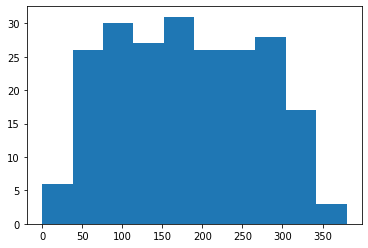

In [ ]:
#ANEXO
#dataset tiempos totales (end to end) creado a partir los casos generados en 6 réplicas

tiempos_totales_2_2= (35.831669401539045, 40.255885268661665, 51.474226464211874, 70.69154194002736, 79.65447847193255, 79.39626815214015, 91.63356877778433, 96.71682953736499, 104.04099054566045, 114.05243301633044, 112.05848933764511, 116.60000024203882, 115.40331383811674, 131.08444644380677, 140.89467790099283, 143.2158548730897, 146.1617554082644, 157.5575108071671, 164.49657158465254, 187.99855030445414, 182.30946819094234, 225.57449436963665, 217.3687723980606, 232.420916627924, 240.2150599587364, 250.68701536232896, 265.14140048578736, 272.38210842062847, 271.7841051587901, 272.624144907462, 260.9453937462149, 281.629862081765, 273.4184719094575, 294.5604151889539, 311.29058624746654, 326.2064826015318, 316.1497497528029, 32.54175697259509, 51.66783436491119, 51.86326633266467, 52.221663185527866, 78.33265501336402, 86.41765435204252, 89.33149433274897, 66.09121041850796, 83.82794582904992, 100.25316057833197, 100.87380879893725, 104.15014554330918, 116.08633489581464, 128.07711523638812, 123.83606894743176, 138.14056416570827, 138.53495566570587, 138.07987726384908, 157.41130649764733, 152.1761071344995, 153.20143332748214, 161.62421138350862, 162.3973250697666, 177.63316569384492, 177.9549788548457, 195.26433155661675, 203.8565844362805, 220.95814509949523, 204.86451003633593, 214.6125226822901, 218.3365449911394, 223.45158429989885, 221.35947582055354, 236.83431774690317, 241.74892292589797, 235.06209181994336, 243.3258912579638, 262.15849753011025, 274.47544438947205, 293.42992749490145, 294.40147665399695, 59.017888802965786, 56.85782043449259, 83.82425749632628, 97.04473163548235, 101.88975716064547, 116.2307171434257, 102.6777200358241, 123.97568014401986, 125.15508778620048, 137.89904552137452, 147.81853295827443, 169.44306998023018, 177.9327028486365, 172.65691745657432, 184.94770652353625, 210.46740956669223, 212.29967502397457, 228.00225696466418, 222.98955132033285, 231.4236417944632, 239.46237848080557, 247.05241715700913, 271.9067507647036, 285.9708915229043, 268.1217464399665, 272.87978262639183, 291.2251059937717, 307.2616108347608, 316.3793456944132, 317.1077412851681, 328.8906112173802, 22.479780467012162, 49.41462789463068, 42.616954745499015, 44.87291102722482, 63.971385680435205, 65.20566704347551, 71.25450106280735, 70.43644060404219, 85.25434019273641, 95.0842509031842, 94.63119164109784, 108.07639513023861, 99.1461198268239, 116.64812094206971, 115.95355406532123, 136.66211446677974, 143.79963799652077, 153.2035606897166, 163.4914865869024, 170.69573999911347, 175.80493195861237, 178.7814680915297, 190.26334900581196, 191.48342275742613, 202.4609636632873, 209.62580120092673, 221.60734050683334, 221.82388606553505, 225.03151583407634, 244.96496436091553, 242.59002032716205, 256.4617163245764, 252.86715618502558, 274.35671823795934, 279.06047953526655, 283.87260987172806, 299.61775719695606, 292.95999160615423, 310.66793462195045, 25.919570891437946, 34.99320343190854, 42.86324549683097, 47.50994816399625, 56.40687773594438, 46.8957713491441, 52.44434143735891, 67.99565902259175, 68.07311779424626, 85.7242489518245, 100.2061921929423, 114.02098659228851, 123.54457276499488, 126.29086530158693, 154.97175163503232, 155.4935818031846, 162.5937319737589, 164.35083575272478, 170.0490898514704, 184.5366287965341, 186.64278918998474, 195.00164218119713, 215.35310931919844, 215.393796174626, 221.65869216417155, 237.6323886344316, 255.31789850007493, 266.0913290167808, 269.52005206212164, 294.7681673785235, 305.79187938384405, 314.499717683373, 321.21353414234954, 337.48853466212415, 342.915521144149, 35.01201480901257, 47.81291648962316, 70.35243186873575, 72.89620088538376, 84.07592727954031, 86.35639136181892, 104.94097490910505, 93.54817590215825, 110.13002125158641, 112.07865011087426, 133.7921530568256, 142.33433447362626, 158.7352616975469, 161.90955815309061, 187.4722817275494, 187.996695258185, 208.65412838796334, 229.43927256174814, 226.92915473232395, 236.49322737749975, 246.2969283311027, 245.49670502399312, 264.65057857552586, 262.3264232678134, 273.45387713118015, 273.9347632859398, 277.0419415539126, 285.5451943944066, 294.266166579533, 300.81049321447085, 304.2568481030414, 316.9769524954915, 325.83324677704775, 324.4836095735189, 340.26708107352647, 344.1389584469295, 353.43413342436224)

print("media: ", np.mean(tiempos_totales_2_2))
print("desv. std: ", np.std(tiempos_totales_2_2))
plt.hist(tiempos_totales_2_2, bins=10, range=(0,380))
plt.show()

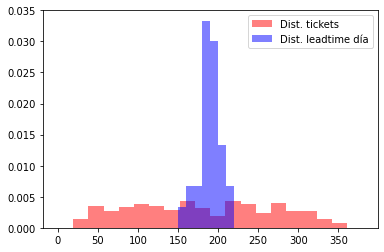

In [ ]:

plt.hist(tiempos_totales_2_2, bins=20, range=(0,380), density=True, color='r', alpha=0.5, label="Dist. tickets")
plt.hist(leadtime_2_2, bins=10, range=(140, 240), density=True, color='b', alpha=0.5, label="Dist. leadtime día")
plt.legend()
plt.show()

Es evidente que la distribución de los tiempos totales de los tickets tiene mayor variabilidad que la de las medias diarias, además no es tan simétrica como la de las medias diarias (leadtime de un día laboral).

La explicación al fenómeno anterior la podemos encontrar en el Teorema del Límite Central (TLC), la que nos dice que independiente de la distribución que tenga la variable medida en los individuos objetos de estudio, si tomamos de esta población de individuos muestras grandes, y luego calculamos su media muestral, estás medias muestrales tendrán una distribución normal.

##Desafío de negocio

Vamos a imaginar que el negocio y sus clientes se encuentran insatisfacehos con los resultados que ha exhibido el Help Desk durante los último meses, esto porque los indicadores monitoreados no cumplen las expectativas planteadas al inicio de este servicio.

Los indicadores más relevantes para este servicio son 2:

1. Nivel de atención de un día laboral.
2. Leadtime end to end de un día laboral. 

Ambos se encuentran fuera del target definido de > 85% para el primero y < 60 minutos para el segundo.

Actualmente el Help Desk tiene el siguiente rendimiento:

* Nivel de atención de un día laboral = 29%
* Leadtime end to end de un día laboral = 185 minutos (sigma= 86 min)

Del 'Análisis de resultados del modelo inicial' podemos apreciar que estos 2 indicadores (29% y 185 min), se encuentran contenido en el intervalo de confianza de 90%. Por tanto podemos concluir que el modelo predice de buena forma el rendimiento del sistema de trabajo.

Otra manaera para validar si el modelo predice bien o tiene buen ajuste,  sería por medio de un test de hipótesis, planteado de la siguiente forma:

* H0: El leadtime diario es igual a 185 minutos
* H1: El leadtime diario es diferente a 185 minutos

Si la media de los 30 leadtime generados en las 30 réplicas, se situa entre los siguientes límites, caería en zona de no rechazo de H0, de lo contario se rechazaría la H0.

$$LI = 185 - 1.64* {\frac{86}{\sqrt{36}}} = 161.49 $$ 
$$LS = 185 + 1.64* {\frac{86}{\sqrt{36}}} = 208.50 $$ 

En este caso como la media de los 30 leadtime es 190.8 minutos cae en la zona de no rechazo, no podemos concluir que existe una diferencia, por tanto el modelo ajusta bien a la realidad.


>Nota 1: se trabaja con muestras de 36 tickets, ya que es el valor promedio de tickets creados/resueltos en un día.
Nota 2: se trabaja con Z=1.64 para una prueba de 2 colas con alpha de 0.10.

Una vez validado el modelo, se procede a configuar distintos escenarios donde modificaremos los parámetros de control, en este caso solo ajustaremos:

* cantidad de agentes proceso N°1
* cantidad de agentes proceso N°2

De tal forma que haremos experimentos, cada uno con 30 réplicas, ajustando dichos parámetros hasta llegar a un escenario que nos permita cumplir las metas de negocio para el Nivel de atención y el Leadtime de un día laboral.

Estos escenarios pueden ser:

* Experimento 1:
 * Cantidad agentes en proceso N° 1 = **3**
 * Cantidad agentes en proceso N° 2 = **3**
* Experimento 2:
 * Cantidad agentes en proceso N° 1 = **4**
 * Cantidad agentes en proceso N° 2 = **4**
* Experimento 3:
 * Cantidad agentes en proceso N° 1 = **5**
 * Cantidad agentes en proceso N° 2 = **5**
* Experimento 4:
 * Cantidad agentes en proceso N° 1 = **6**
 * Cantidad agentes en proceso N° 2 = **6**


Luego de realizar todos los experimentos anteriores, es el experimento número 4 el que generó los mejores resultados, es decir, la distribución de los indicadores "nivel de atención diario" y "leadtime de un día laboral" se acercan a la meta trazada.

A contunuación veamos en particular los resultados de este escenario:



### Análisis de Resultados Modelo con 12 agentes (6 + 6)

* Cantidad agentes en proceso N° 1 = **6**
* Cantidad agentes en proceso N° 2 = **6**

####Cantidad de tickets creados en un día laboral

media :  125.33333333333333
median :  125.0


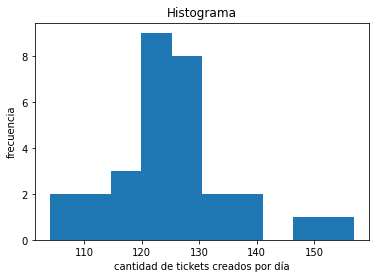

In [ ]:
#dataset "cantidad de tickets creados" luego de las 30 replicas 

q_creados_6_6 = (122,	115,	119,	105,	126,	126,	123,	116,	128,	123,	125,	125,	110,	132,	128,	124,	128,	137,	124,	157,	136,	131,	125,	128,	127,	113,	150,	129,	124,	104)
print('media : ', np.mean(q_creados_6_6))
print('median : ', np.median(q_creados_6_6))

plt.hist(q_creados_6_6, bins=10)
plt.ylabel('frecuencia')
plt.xlabel('cantidad de tickets creados por día')
plt.title('Histograma')
plt.show()

####Cantidad de tickets resueltos en un día laboral

media :  104.2
median :  104.5


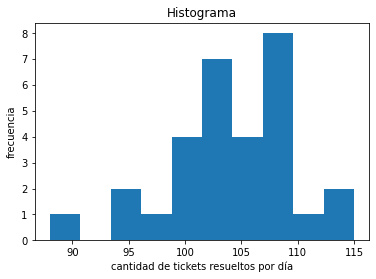

In [ ]:
#dataset "cantidad de tickets resueltos" luego de las 30 replicas 

q_resueltos_6_6 = (106,	98,	104,	100,	104,	102,	104,	103,	111,	108,	108,	100,	95,	105,	96,	102,	109,	109,	106,	101,	115,	107,	100,	106,	108,	103,	107,	114,	107,	88)
print('media : ', np.mean(q_resueltos_6_6))
print('median : ', np.median(q_resueltos_6_6))

plt.hist(q_resueltos_6_6, bins=10)
plt.ylabel('frecuencia')
plt.xlabel('cantidad de tickets resueltos por día')
plt.title('Histograma')
plt.show()

####Nivel de atención de un día laboral

media :  0.835349840093585
median :  0.8482737734937005


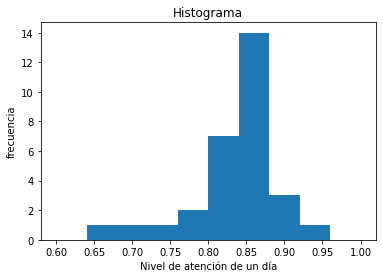

In [ ]:
#dataset "nivel de atención" luego de las 30 replicas 

nivel_atencion_6_6 = (0.868852459016393,	0.852173913043478,	0.873949579831932,	0.952380952380952,	0.825396825396825,	0.809523809523809,	0.845528455284552,	0.887931034482758,	0.8671875,	0.878048780487804,	0.864,	0.8,	0.863636363636363,	0.795454545454545,	0.75,	0.82258064516129,	0.8515625,	0.795620437956204,	0.854838709677419,	0.643312101910828,	0.845588235294117,	0.816793893129771,	0.8,	0.828125,	0.850393700787401,	0.911504424778761,	0.713333333333333,	0.883720930232558,	0.862903225806451,	0.8461538462)
print('media : ', np.mean(nivel_atencion_6_6))
print('median : ', np.median(nivel_atencion_6_6))

plt.hist(nivel_atencion_6_6, bins=10, range=(0.6, 1))
plt.ylabel('frecuencia')
plt.xlabel('Nivel de atención de un día')
plt.title('Histograma')
plt.show()

####Leadtime end to end de un día laboral

media :  69.23411117785719
median :  68.73648243568539
desv. std :  15.366182573296228


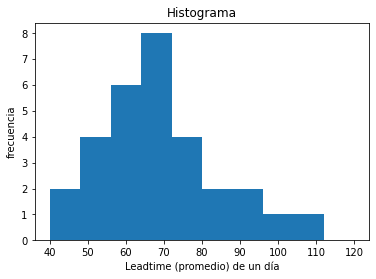

In [ ]:
#dataset "leadtime" luego de las 30 replicas 

leadtime_6_6 = (77.7755504658576,	49.8441997177277,	44.8449992023631,	61.4319700990561,	71.7068198625584,	61.0558109550445,	76.3808125742075,	48.2472966809966,	60.0976070264819,	62.7662002729237,	82.2288706551354,	70.6177971396824,	48.4617875720327,	77.169481988603,	67.8927654147056,	48.4599101317043,	68.1327773124144,	89.3547927174183,	68.7888914929531,	104.632427450098,	68.6840733784177,	89.7051162519958,	76.4994446151993,	86.8653036518144,	62.9893585697354,	61.361034813918,	102.430036772007,	70.5475640521686,	71.9695632784953,	46.08107122)
print('media : ', np.mean(leadtime_6_6))
print('median : ', np.median(leadtime_6_6))
print('desv. std : ', np.std(leadtime_6_6))

plt.hist(leadtime_6_6, bins=10, range=(40, 120))
plt.ylabel('frecuencia')
plt.xlabel('Leadtime (promedio) de un día')
plt.title('Histograma')
plt.show()

####Conclusión

Los resultados muestran una mejora significativa al comparar este escenario (6 + 6) V/S la situaicón inicial (2 + 2), esto para los 2 indicadores objeto de optimización. A modo de resumen se comparten los boxplots para ambos indicadores.



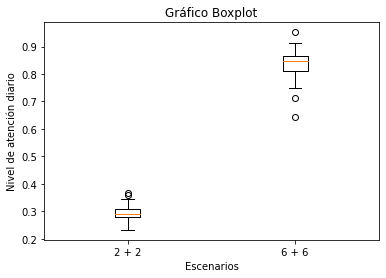

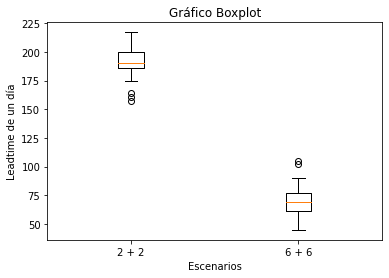

In [ ]:
#Graficar boxplots de nivel de atención

columns_to_plot = [nivel_atencion_2_2, nivel_atencion_6_6]

plt.boxplot(columns_to_plot)
plt.ylabel('Nivel de atención diario')
plt.xlabel('Escenarios')
plt.title('Gráfico Boxplot')
plt.xticks([1, 2],
           ["2 + 2", "6 + 6"])
plt.show()

columns_to_plot = [leadtime_2_2,  leadtime_6_6]

plt.boxplot(columns_to_plot)
plt.ylabel('Leadtime de un día')
plt.xlabel('Escenarios')
plt.title('Gráfico Boxplot')
plt.xticks([1, 2],
           ["2 + 2", "6 + 6"])
plt.show()

Si bien existe una mejora significativa, aún falta mejorar para llegar a las metas planteadas. Por esta razón se continuará con nuevos experimentos, donde primero incorporaremos 1 nueva persona al Help Desk, primero en el proceso N°1 y luego otro experimento donde esta persona adicional se sumará al proceso N°2. Finalmente el último experimento será con 7 personas en el proceso N°1 y 7 en el proceso N°2. 

Aquí la configuración:

* Experimento 5:
 * Cantidad agentes en proceso N° 1 = **7**
 * Cantidad agentes en proceso N° 2 = **6**
* Experimento 6:
 * Cantidad agentes en proceso N° 1 = **6**
 * Cantidad agentes en proceso N° 2 = **7**
* Experimento 7:
 * Cantidad agentes en proceso N° 1 = **7**
 * Cantidad agentes en proceso N° 2 = **7**




### Análisis de Resultados Modelo con 13 agentes (7 + 6)

* Cantidad agentes en proceso N° 1 = **7**
* Cantidad agentes en proceso N° 2 = **6**

####Cantidad de tickets creados en un día laboral


media :  121.66666666666667
median :  120.5


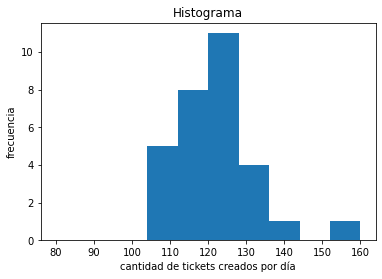

In [ ]:
#dataset "cantidad de tickets creados" luego de las 30 replicas 

q_creados_7_6 = (115,	154,	121,	127,	118,	116,	133,	108,	121,	115,	126,	124,	143,	109,	127,	109,	119,	125,	125,	116,	108,	120,	117,	117,	110,	128,	120,	128,	121,	130)
print('media : ', np.mean(q_creados_7_6))
print('median : ', np.median(q_creados_7_6))

plt.hist(q_creados_7_6, bins=10, range=(80, 160))
plt.ylabel('frecuencia')
plt.xlabel('cantidad de tickets creados por día')
plt.title('Histograma')
plt.show()

####Cantidad de tickets resueltos en un día laboral

media :  103.23333333333333
median :  103.5


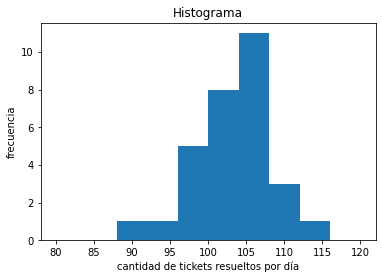

In [ ]:
#dataset "cantidad de tickets resueltos" luego de las 30 replicas 

q_resueltos_7_6 = (101,	106,	95,	103,	107,	98,	107,	91,	109,	107,	113,	103,	107,	99,	104,	97,	111,	106,	96,	101,	98,	101,	105,	103,	105,	107,	107,	110,	100,	100)
print('media : ', np.mean(q_resueltos_7_6))
print('median : ', np.median(q_resueltos_7_6))

plt.hist(q_resueltos_7_6, bins=10, range=(80, 120))
plt.ylabel('frecuencia')
plt.xlabel('cantidad de tickets resueltos por día')
plt.title('Histograma')
plt.show()

####Nivel de atención de un día laboral

media :  0.8522997954405713
median :  0.8536874999999999
desv. std :  0.059550009445770095


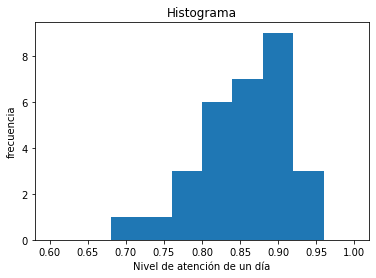

In [ ]:
#dataset "nivel de atención" luego de las 30 replicas 

nivel_atencion_7_6 = (0.878260869565217,	0.688311688311688,	0.785123966942148,	0.811023622047244,	0.906779661016949,	0.844827586206896,	0.804511278195488,	0.842592592592592,	0.900826446280991,	0.930434782608695,	0.896825396825396,	0.830645161290322,	0.748251748251748,	0.908256880733945,	0.818897637795275,	0.889908256880733,	0.932773109243697,	0.848,	0.768,	0.870689655172413,	0.907407407407407,	0.841666666666666,	0.897435897435897,	0.88034188034188,	0.954545454545454,	0.8359375,	0.891666666666666,	0.859375,	0.826446280991735,	0.7692307692)
print('media : ', np.mean(nivel_atencion_7_6))
print('median : ', np.median(nivel_atencion_7_6))
print('desv. std : ', np.std(nivel_atencion_7_6))

plt.hist(nivel_atencion_7_6, bins=10, range=(0.6, 1))
plt.ylabel('frecuencia')
plt.xlabel('Nivel de atención de un día')
plt.title('Histograma')
plt.show()

####Leadtime end to end de un día laboral

media :  62.947087538403395
median :  58.85551411218595
desv. std :  14.278202691447657


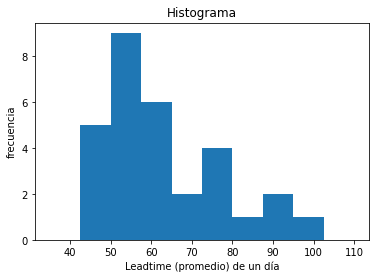

In [ ]:
#dataset "leadtime" luego de las 30 replicas 

leadtime_7_6 = (49.1583700819085,	99.0533526345536,	61.7102852322823,	82.0716740199001,	75.8669605798243,	58.9988543359881,	91.7117890817056,	47.9534404529701,	63.0071097367501,	50.0256823940301,	47.9709323379706,	64.4313735298912,	76.4917384357869,	44.8833550228611,	55.0968182281751,	56.8770522018284,	65.5131876839091,	73.9362035659634,	79.8549101663167,	46.5015064883481,	52.5896192016395,	52.3636933077031,	50.5158797155093,	56.374835893221,	51.894337294223,	58.7121738883838,	65.2399701292719,	56.4945455351782,	63.1323334660087,	89.98064151)
print('media : ', np.mean(leadtime_7_6))
print('median : ', np.median(leadtime_7_6))
print('desv. std : ', np.std(leadtime_7_6))

plt.hist(leadtime_7_6, bins=10, range=(35, 110))
plt.ylabel('frecuencia')
plt.xlabel('Leadtime (promedio) de un día')
plt.title('Histograma')
plt.show()

####Conclusiones 
Este escenario que adiciona una nueva persona al Help Desk (al primer proceso), no genera resultados muy diferentes al escenario con 6 y 6 agentes visto anteriormente, y en consecuencia tampoco vemos cumplimiento del target trazado por el negocio.

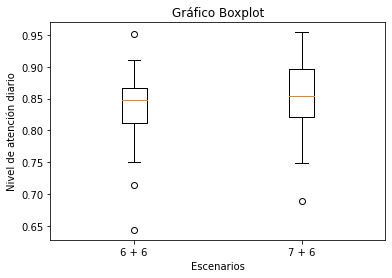

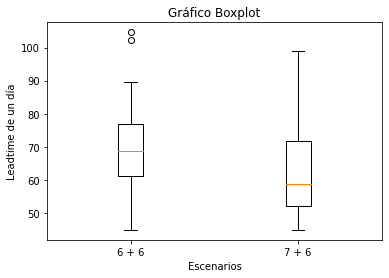

In [ ]:
#Graficar boxplots de nivel de atención

columns_to_plot = [nivel_atencion_6_6, nivel_atencion_7_6]

plt.boxplot(columns_to_plot)
plt.ylabel('Nivel de atención diario')
plt.xlabel('Escenarios')
plt.title('Gráfico Boxplot')
plt.xticks([1, 2],
           ["6 + 6", "7 + 6"])
plt.show()

columns_to_plot = [leadtime_6_6,  leadtime_7_6]

plt.boxplot(columns_to_plot)
plt.ylabel('Leadtime de un día')
plt.xlabel('Escenarios')
plt.title('Gráfico Boxplot')
plt.xticks([1, 2],
           ["6 + 6", "7 + 6"])
plt.show()

Si quisieramos calcular la probabilidad de cumplir el target en nivel de atención y en leadtime, podríamos hacerlo con el siguiente código:

In [ ]:
#nivel de atención
target_na= 0.85
prob_mayor_85 = stats.norm(np.mean(nivel_atencion_7_6), np.std(nivel_atencion_7_6)).sf(target_na)
print('Prob cumplir target Nivel de atención: ',prob_mayor_85)


#Leadtime
target_lt= 60
prob_menor_60 = stats.norm(np.mean(leadtime_7_6), np.std(leadtime_7_6)).cdf(target_lt)
print('Prob cumplir target Nivel de atención: ',prob_menor_60)

Prob cumplir target Nivel de atención:  0.5154031482093854
Prob cumplir target Nivel de atención:  0.4182374164430283


La probabilidad es muy baja, debemos seguir iterando con otro escenario.

### Análisis de Resultados Modelo con 13 agentes (6 + 7)

* Cantidad agentes en proceso N° 1 = **6**
* Cantidad agentes en proceso N° 2 = **7**

####Cantidad de tickets creados en un día laboral

media :  121.26666666666667
median :  121.5


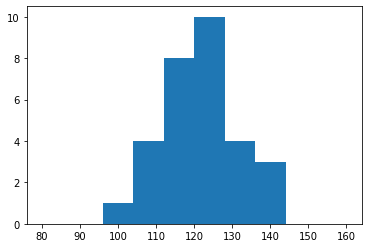

In [ ]:
#dataset "cantidad de tickets creados" luego de las 30 replicas 

q_creados_6_7 = (135,	114,	130,	139,	117,	109,	96,	110,	123,	127,	133,	126,	115,	125,	127,	114,	121,	109,	124,	138,	115,	113,	110,	113,	134,	121,	122,	123,	138,	117)
print('media : ', np.mean(q_creados_6_7))
print('median : ', np.median(q_creados_6_7))

plt.hist(q_creados_6_7, bins=10, range=(80, 160))
plt.show()

####Cantidad de tickets resueltos en un día laboral

media :  107.56666666666666
median :  107.5


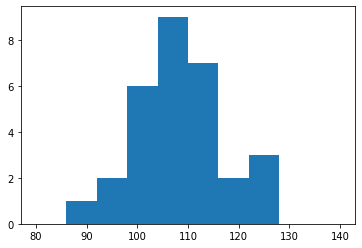

In [ ]:
#dataset "cantidad de tickets resueltos" luego de las 30 replicas 

q_resueltos_6_7 = (122,	103,	116,	120,	108,	99,	88,	97,	112,	110,	115,	110,	104,	109,	115,	97,	107,	98,	110,	122,	108,	101,	100,	104,	112,	102,	106,	105,	122,	105)
print('media : ', np.mean(q_resueltos_6_7))
print('median : ', np.median(q_resueltos_6_7))

plt.hist(q_resueltos_6_7, bins=10, range=(80, 140))
plt.show()

####Nivel de atención de un día laboral

media :  0.8879829934903113
median :  0.88970223325062
desv. std :  0.02468018420139606


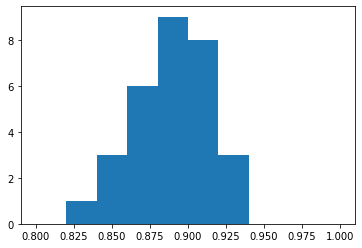

In [ ]:
#dataset "nivel de atención" luego de las 30 replicas 

nivel_atencion_6_7 = (0.903703703703703,	0.903508771929824,	0.892307692307692,	0.863309352517985,	0.923076923076923,	0.908256880733945,	0.916666666666666,	0.881818181818181,	0.910569105691056,	0.866141732283464,	0.864661654135338,	0.873015873015873,	0.904347826086956,	0.872,	0.905511811023622,	0.850877192982456,	0.884297520661157,	0.899082568807339,	0.887096774193548,	0.884057971014492,	0.939130434782608,	0.893805309734513,	0.909090909090909,	0.920353982300884,	0.835820895522388,	0.84297520661157,	0.868852459016393,	0.853658536585365,	0.884057971014492,	0.8974358974)
print('media : ', np.mean(nivel_atencion_6_7))
print('median : ', np.median(nivel_atencion_6_7))
print('desv. std : ', np.std(nivel_atencion_6_7))

plt.hist(nivel_atencion_6_7, bins=10, range=(0.8, 1))
plt.show()

####Leadtime end to end de un día laboral

media :  48.15055526410494
median :  46.8647355642982
desv. std :  4.244337367479355


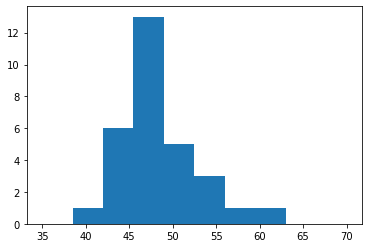

In [ ]:
#dataset "leadtime" luego de las 30 replicas 

leadtime_6_7 = (53.1975596318308,	49.0244255473882,	56.4567660607805,	62.315738496735,	47.4281121105065,	46.6693427385964,	41.9643835213676,	49.8300003236978,	45.3129103834484,	46.2416443983409,	54.8283574717164,	45.0278871046012,	46.4974472088699,	47.1194241680025,	49.210585830925,	42.9706044889407,	45.220848756284,	44.3338572635864,	45.9869260692168,	47.7193533971424,	51.6963373720519,	45.9063969156246,	45.7106181342354,	45.9948574833915,	49.4042514184657,	45.8652389578306,	44.8065634654348,	47.3734979407537,	53.3425928733828,	47.06012839)
print('media : ', np.mean(leadtime_6_7))
print('median : ', np.median(leadtime_6_7))
print('desv. std : ', np.std(leadtime_6_7))

plt.hist(leadtime_6_7, bins=10, range=(35, 70))
plt.show()

####Conclusiones

Este escenario que adiciona una nueva persona al Help Desk (al segundo proceso), vemos que si genera resultados diferentes al escenario con 6 y 6 agentes visto anteriormente. Estos resultados se acercan y calzan muy bien con las metas trazadas.

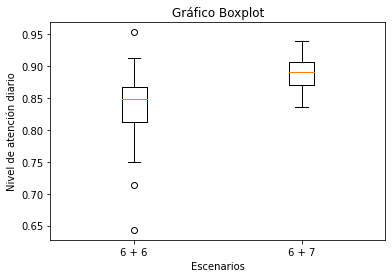

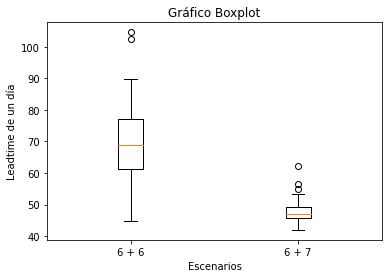

In [ ]:
#Graficar boxplots de nivel de atención

columns_to_plot = [nivel_atencion_6_6, nivel_atencion_6_7]

plt.boxplot(columns_to_plot)
plt.ylabel('Nivel de atención diario')
plt.xlabel('Escenarios')
plt.title('Gráfico Boxplot')
plt.xticks([1, 2],
           ["6 + 6", "6 + 7"])
plt.show()

columns_to_plot = [leadtime_6_6,  leadtime_6_7]

plt.boxplot(columns_to_plot)
plt.ylabel('Leadtime de un día')
plt.xlabel('Escenarios')
plt.title('Gráfico Boxplot')
plt.xticks([1, 2],
           ["6 + 6", "6 + 7"])
plt.show()

Si quisieramos calcular la probabilidad de cumplir el target en nivel de atención y en leadtime, podríamos hacerlo con el siguiente código:

In [407]:
#nivel de atención
target_na= 0.85
prob_mayor_85 = stats.norm(np.mean(nivel_atencion_6_7), np.std(nivel_atencion_6_7)).sf(target_na)
print('Prob cumplir target Nivel de atención: ',prob_mayor_85)


#Leadtime
target_lt= 60
prob_menor_60 = stats.norm(np.mean(leadtime_6_7), np.std(leadtime_6_7)).cdf(target_lt)
print('Prob cumplir target Leadtime: ',prob_menor_60)

Prob cumplir target Nivel de atención:  0.9380987916114423
Prob cumplir target Leadtime:  0.9973794106642423


Una buena seguridad es de 85% o 90%, en este caso ambos cuentan con una probabilidad de cumplirse sobre 90%.


De todas formas haremos el último experimento, tomaremos este escenario óptimo (6 + 7) y le incorporaremos una nueva persona, pero ahora al primer proceso de tal forma de tener 7 y 7 agentes, veamos si genera una mejora.

### Análisis de Resultados Modelo con 14 agentes (7 + 7)

* Cantidad agentes en proceso N° 1 = **7**
* Cantidad agentes en proceso N° 2 = **7**

####Cantidad de tickets creados en un día laboral

media :  120.0
median :  119.0


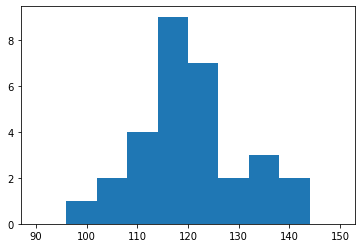

In [ ]:
#dataset "cantidad de tickets creados" luego de las 30 replicas 

q_creados_7_7 = (105,	125,	119,	108,	126,	127,	121,	115,	142,	118,	112,	143,	108,	117,	132,	117,	125,	120,	117,	119,	100,	113,	118,	120,	104,	123,	124,	134,	133,	115)
print('media : ', np.mean(q_creados_7_7))
print('median : ', np.median(q_creados_7_7))

plt.hist(q_creados_7_7, bins=10, range=(90, 150))
plt.show()

####Cantidad de tickets resueltos en un día laboral

media :  105.1
median :  105.5


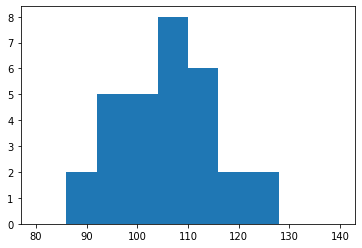

In [ ]:
#dataset "cantidad de tickets resueltos" luego de las 30 replicas 

q_resueltos_7_7 = (96,	111,	111,	100,	111,	110,	104,	108,	122,	97,	92,	125,	96,	101,	116,	103,	105,	106,	98,	106,	87,	99,	110,	107,	90,	107,	105,	121,	113,	96)
print('media : ', np.mean(q_resueltos_7_7))
print('median : ', np.median(q_resueltos_7_7))

plt.hist(q_resueltos_7_7, bins=10, range=(80, 140))
plt.show()

####Nivel de atención de un día laboral

media :  0.8761955063551514
median :  0.8751160344080695
desv. std :  0.03100813690943246


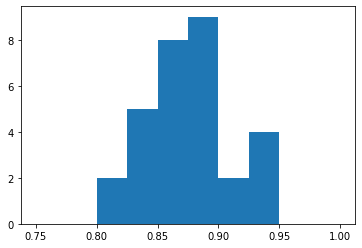

In [ ]:
#dataset "nivel de atención" luego de las 30 replicas 

nivel_atencion_7_7 = (0.914285714285714,	0.888,	0.932773109243697,	0.925925925925925,	0.88095238095238,	0.866141732283464,	0.859504132231405,	0.939130434782608,	0.859154929577464,	0.822033898305084,	0.821428571428571,	0.874125874125874,	0.888888888888888,	0.863247863247863,	0.878787878787878,	0.88034188034188,	0.84,	0.883333333333333,	0.837606837606837,	0.890756302521008,	0.87,	0.876106194690265,	0.932203389830508,	0.891666666666666,	0.865384615384615,	0.869918699186991,	0.846774193548387,	0.902985074626865,	0.849624060150376,	0.8347826087)
print('media : ', np.mean(nivel_atencion_7_7))
print('median : ', np.median(nivel_atencion_7_7))
print('desv. std : ', np.std(nivel_atencion_7_7))

plt.hist(nivel_atencion_7_7, bins=10, range=(0.75, 1))
plt.show()

####Leadtime end to end de un día laboral

media :  49.00685479740911
median :  46.97784535112485
desv. std :  6.123806425763224


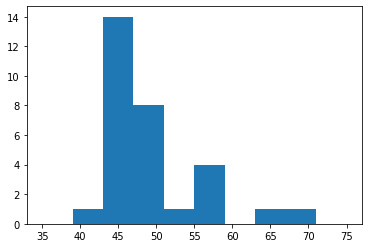

In [ ]:
#dataset "leadtime" luego de las 30 replicas 

leadtime_7_7 = (43.322609896691,	47.084180425769,	45.7720978324494,	46.156849988107,	46.6197117347084,	57.2581328874476,	56.0493584196893,	45.6947766761175,	56.532099201808,	48.0833235558764,	47.7781348669569,	48.4721537127348,	45.5728938345168,	51.8554585602254,	55.4767600336189,	48.3963766899343,	45.5228953511932,	47.6058706796067,	44.3303444366427,	44.9878699944936,	45.7933292366337,	45.1188994440432,	43.6738025569844,	47.9401518730451,	41.117363422725,	46.8715102764807,	47.0931850707286,	68.2184092771946,	65.1999877058515,	46.60710628)
print('media : ', np.mean(leadtime_7_7))
print('median : ', np.median(leadtime_7_7))
print('desv. std : ', np.std(leadtime_7_7))

plt.hist(leadtime_7_7, bins=10, range=(35, 75))
plt.show()

####Conclusiones

Al comparar los resultados de este escenario (7+7) V/S el escenario óptimo anterior con 6 + 7 agentes, no vemos diferencias. Por un tema de eficiencia recomendamos el escenario con 6 + 7 agentes.

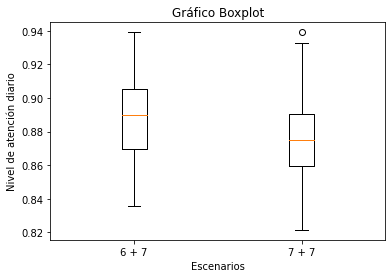

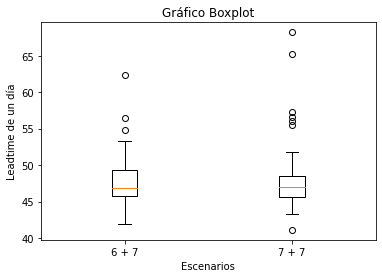

In [ ]:
#Graficar boxplots de nivel de atención

columns_to_plot = [nivel_atencion_6_7, nivel_atencion_7_7]

plt.boxplot(columns_to_plot)
plt.ylabel('Nivel de atención diario')
plt.xlabel('Escenarios')
plt.title('Gráfico Boxplot')
plt.xticks([1, 2],
           ["6 + 7", "7 + 7"])
plt.show()

columns_to_plot = [leadtime_6_7,  leadtime_7_7]

plt.boxplot(columns_to_plot)
plt.ylabel('Leadtime de un día')
plt.xlabel('Escenarios')
plt.title('Gráfico Boxplot')
plt.xticks([1, 2],
           ["6 + 7", "7 + 7"])
plt.show()

Al calcular la probabilidad de cumplir target vemos que este escenario tiene menos capacidad que el anterior con 6 + 7 agentes.

In [406]:
#nivel de atención
target_na= 0.85
prob_mayor_85 = stats.norm(np.mean(nivel_atencion_7_7), np.std(nivel_atencion_7_7)).sf(target_na)
print('Prob cumplir target Nivel de atención: ',prob_mayor_85)


#Leadtime
target_lt= 60
prob_menor_60 = stats.norm(np.mean(leadtime_7_7), np.std(leadtime_7_7)).cdf(target_lt)
print('Prob cumplir target Leadtime: ',prob_menor_60)

Prob cumplir target Nivel de atención:  0.8008872325810505
Prob cumplir target Leadtime:  0.9636850210964173


A continuación un resumen con todos los escenarios desarrollados:

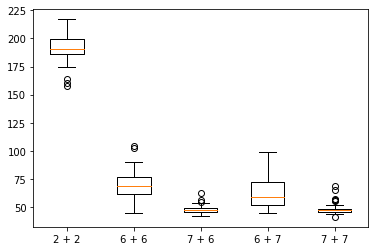

In [ ]:
#Boxplot resumen
columns_to_plot = [leadtime_2_2, leadtime_6_6, leadtime_6_7, leadtime_7_6, leadtime_7_7]
plt.boxplot(columns_to_plot)
plt.xticks([1, 2, 3 , 4, 5],
           ["2 + 2", "6 + 6", "7 + 6", "6 + 7", "7 + 7"])
plt.show()

La invitación es a seguir planteando hipótesis y a crear experimientos, por ejemplo:

* ¿qué pasa sí trabajamos con un modelo con 5 + 7 agentes?
* ¿qué pasa si al modelo con 6 + 6 agentes al proceso N°2 le aplicamos una mejora que reduzca la media de ese proceso en 2 minutos ?

o está que procederé a testear:
* ¿qué pasa sí el proceso ahora es más Lean, es decir los agentes tendrán la habilidad de desarrollar de forma autónoma tanto el proceso N°1 como el N°2, es decir, sin tener especialista por proceso, y así evitar dependencias ?


Para esta última idea procederé a crear un nuevo modelo donde los agentes trabajan de punta a punta (end to ened) los requerimientos, mantendré la misma variabialidad en el arribo de requerimientos y en los tiempos de proceso N°1 y proceso N°2, pero comenzaré con 10 agentes en el Help Desk.

###Análisis de Resultados Modelo Lean con 10 agentes

* Cantidad agentes en sistema: 10 (multi-skill)

####Cantidad de tickets creados en un día laboral

media :  117.33333333333333
median :  118.0


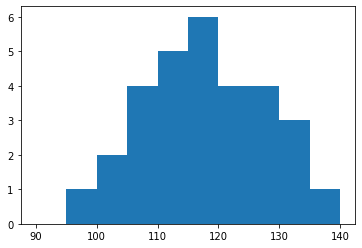

In [ ]:
#dataset "cantidad de tickets creados" luego de las 30 replicas 

q_creados_10 = (125,	121,	127,	118,	111,	114,	118,	117,	129,	97,	132,	119,	101,	113,	102,	125,	132,	111,	130,	108,	120,	118,	123,	107,	118,	138,	109,	105,	111,	121)
print('media : ', np.mean(q_creados_10))
print('median : ', np.median(q_creados_10))

plt.hist(q_creados_10, bins=10, range=(90, 140))
plt.show()

####Cantidad de tickets resueltos en un día laboral

media :  98.3
median :  99.5


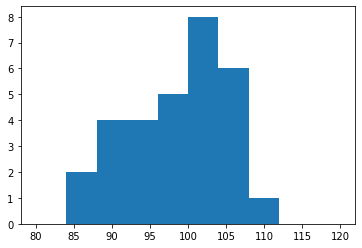

In [ ]:
#dataset "cantidad de tickets resueltos" luego de las 30 replicas 

q_resueltos_10 = (101,	107,	99,	101,	96,	92,	98,	103,	106,	90,	102,	87,	90,	98,	87,	107,	107,	104,	100,	96,	103,	93,	110,	90,	102,	102,	92,	93,	89,	104)
print('media : ', np.mean(q_resueltos_10))
print('median : ', np.median(q_resueltos_10))

plt.hist(q_resueltos_10, bins=10, range=(80, 120))
plt.show()

####Nivel de atención de un día laboral

media :  0.8404431102981236
median :  0.8544366899302089
desv. std :  0.050622571980637056


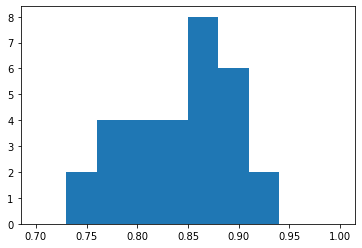

In [ ]:
#dataset "nivel de atención" luego de las 30 replicas 

nivel_atencion_10 = (0.808,	0.884297520661157,	0.779527559055118,	0.85593220338983,	0.864864864864864,	0.807017543859649,	0.830508474576271,	0.88034188034188,	0.821705426356589,	0.927835051546391,	0.772727272727272,	0.731092436974789,	0.891089108910891,	0.867256637168141,	0.852941176470588,	0.856,	0.81060606060606,	0.936936936936936,	0.769230769230769,	0.888888888888888,	0.858333333333333,	0.788135593220339,	0.89430894308943,	0.841121495327102,	0.864406779661017,	0.739130434782608,	0.844036697247706,	0.885714285714285,	0.801801801801801,	0.8595041322)
print('media : ', np.mean(nivel_atencion_10))
print('median : ', np.median(nivel_atencion_10))
print('desv. std : ', np.std(nivel_atencion_10))

plt.hist(nivel_atencion_10, bins=10, range=(0.7, 1))
plt.show()

####Leadtime end to end de un día laboral

media :  59.10315398786601
median :  57.4955361467393
desv. std :  10.692881202693417


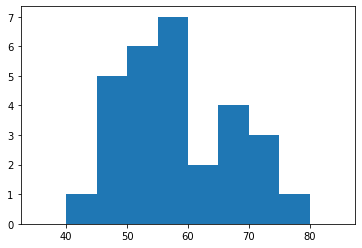

In [ ]:
#dataset "leadtime" luego de las 30 replicas 

leadtime_10 = (53.1863054978049,	53.2612969324382,	71.7309401026294,	58.9759604216758,	47.7658880298651,	61.026104922349,	57.7298706680236,	51.6020378434249,	71.9253073663495,	50.5544056907006,	67.5954012027775,	67.4082744127459,	57.261201625455,	56.7830632757687,	55.779709150814,	50.3577318585442,	77.3067153144377,	46.0836769224701,	66.5089683243229,	48.2067916324666,	91.5704616969531,	53.6056626704019,	61.4775914821813,	47.3216918687722,	70.8206745562992,	68.233277248549,	47.1540420928041,	42.7090659519467,	59.1570735330091,	59.99542734)
print('media : ', np.mean(leadtime_10))
print('median : ', np.median(leadtime_10))
print('desv. std : ', np.std(leadtime_10))

plt.hist(leadtime_10, bins=10, range=(35, 85))
plt.show()

####Conclusiones

Al analizar los resultados de este escenario, vemos que no cumple de buena forma el target planteado, pero podemos darnos cuenta que sus resultados son muy similares al escenario con procesos especializados con 6 + 6 agentes. La diferencia aquí radica en los costos asociados, ya que este escenario tendría los mismos resultados que el modelo con 12 agentes (6 + 6) pero con menores costos, aproximdamente un 17% menor.

Tendríamos que probar otro escenario con 11 agentes en modo lean y ver si cumple el target. 






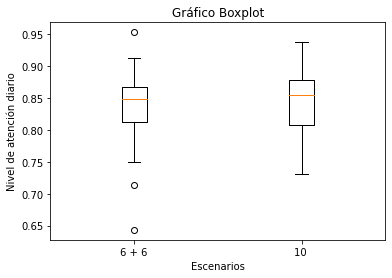

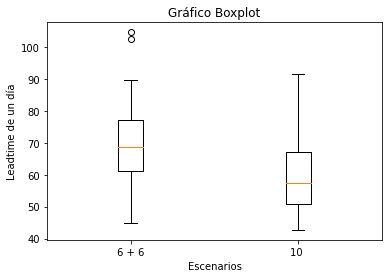

In [ ]:
#Graficar boxplots de nivel de atención

columns_to_plot = [nivel_atencion_6_6, nivel_atencion_10]

plt.boxplot(columns_to_plot)
plt.ylabel('Nivel de atención diario')
plt.xlabel('Escenarios')
plt.title('Gráfico Boxplot')
plt.xticks([1, 2],
           ["6 + 6", "10 "])
plt.show()

columns_to_plot = [leadtime_6_6,  leadtime_10]

plt.boxplot(columns_to_plot)
plt.ylabel('Leadtime de un día')
plt.xlabel('Escenarios')
plt.title('Gráfico Boxplot')
plt.xticks([1, 2],
           ["6 + 6", "10 "])
plt.show()

###Cierre

Para finalizar solo quiero recordar que este es solo un ejercicio de ejemplo, hemos dejado muchos factores aleatorios fuera del modelo de simulación, así como respuestas interesantes de evaluar como por ejemplo la utilización, productividad, ingresos por ticket finalizado, premios o multas, entre otros.

Espero sea de gran valor y lo puedas poner en prática ya sea ejecutando nuevos escenarios, creando más replicas, o ajustándolo a nuevos desafíos o casos de uso. Recuerda solo necesitas Colab y podrás jugar a tu ritmo, aplicando programación con Python, tal como lo hemos visto en este notebook, la que nos permitió contar con una enorme cantidad de potentes herramientas matemáticas y estadísticas, sumado a ello SimPy para simulación discreta, lo que se traduce sin duda en un toolkit de alto valor.


¿Tienes alguna pregunta o sugerencia? Déjame comentarios en https://www.linkedin.com/in/robertomoragad/ y haré todo lo posible para responder.



##Referencias

* Teorema del límite central  https://en.wikipedia.org/wiki/Central_limit_theorem
* framework SimPy https://simpy.readthedocs.io/en/latest/
* Simulación discreta https://en.wikipedia.org/wiki/Discrete-event_simulation
